In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from preprocessing import preprocess

In [21]:
X, y = preprocess("train.csv", test=False)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

In [23]:
std = StandardScaler()
columns = X.columns
X_train = pd.DataFrame(columns=columns, data=std.fit_transform(X))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [25]:
results = cross_val_score(RandomForestClassifier(), X, y, scoring="roc_auc")
results

array([0.8372615 , 0.90108025, 0.90186588, 0.87288159, 0.86728395])

[0.84156846, 0.90304433, 0.90747755, 0.86412738, 0.86397306]

# Visualization of the results

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

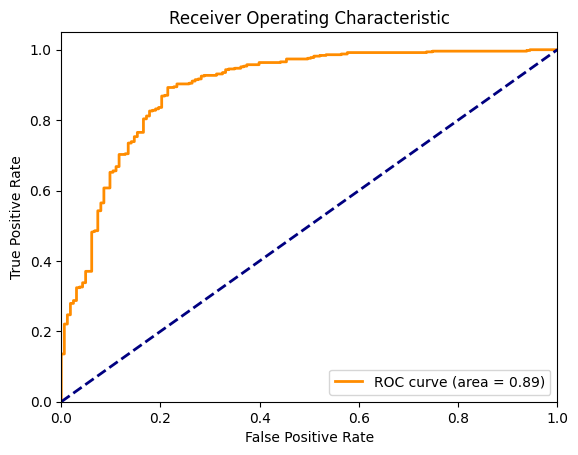

In [28]:
from sklearn.metrics import roc_curve, auc

# Obtenir les probabilités de la classe positive
y_scores = model.predict_proba(X_valid)[:, 1]

# Calculer les valeurs ROC
fpr, tpr, thresholds = roc_curve(y_valid, y_scores)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

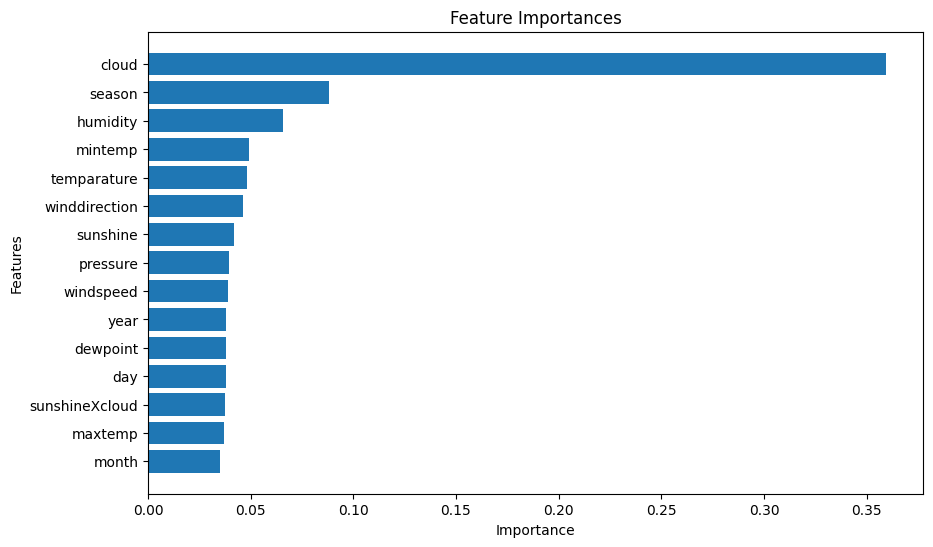

In [29]:
# Importance des variables
importances = model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

# GridSearch

In [30]:
#from sklearn.model_selection import GridSearchCV
#
## Définir le modèle de base
#model = xgb.XGBRegressor(
#    eval_metric="auc",
#    early_stopping_rounds=100,
#    random_state=42
#)
#
## Définir les hyperparamètres à tester
#param_grid = {
#    'max_depth': [4, 6, 8],
#    'colsample_bytree': [0.8, 0.9, 1.0],
#    'subsample': [0.8, 0.9, 1.0],
#    'n_estimators': [500, 2500, 5000, 10000],
#    'learning_rate': [0.05, 0.1]
#}
#
## Configurer GridSearchCV
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                           scoring='roc_auc', cv=5, verbose=4, n_jobs=-1)
#
## Exécuter la recherche de grille
#grid_search.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
#
## Afficher les meilleurs paramètres
#print("Meilleurs paramètres trouvés :", grid_search.best_params_)
#
## Évaluer le modèle avec les meilleurs paramètres
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_valid)
#accuracy = roc_auc_score(y_valid, y_pred)
#print("Précision du modèle avec les meilleurs paramètres :", accuracy)
#

# Submission

In [31]:
#model = xgb.XGBRegressor()
#model.fit(X, y)

In [32]:
X_test = preprocess("test.csv", test=True)
X_test.head(3)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,year,month,season,sunshineXcloud
id,,,,,,,,,,,,,,,
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,2023,1,0,0.0
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,2023,1,0,0.0
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,2023,1,0,0.0


In [33]:
id_submission = X_test.index

In [34]:
predictions = model.predict(X_test)
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
submission = pd.DataFrame(columns=['id', 'rainfall'])
submission['id'] = id_submission
submission['rainfall'] = predictions
submission['rainfall'] = submission['rainfall'].apply(
    lambda x: round(x, 2)
)
submission.head()

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0


In [36]:
submission.to_csv('submission.csv', index=False)